# Swarm Mode

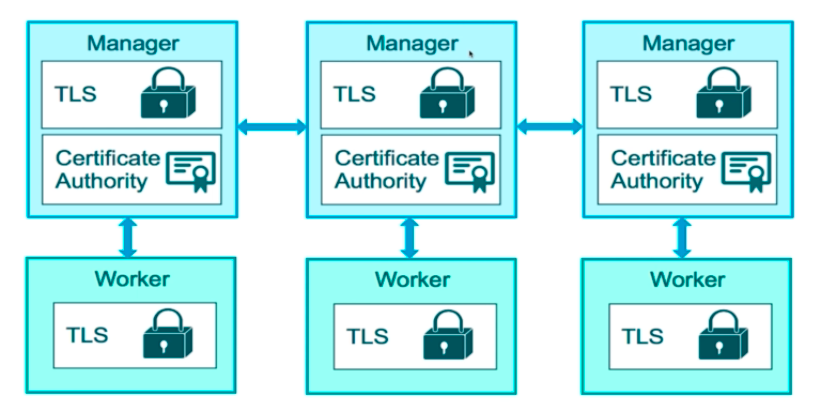

# Create your first service and scale it locally

```bash
docker info
docker swarm init
``` 

- docker swarm init : What just happended?
  - Lots of PKI and security automation
    - root signing certificate created for our swarm
    - certificate is issued for first manager node
    - join tokens are created
  
- Raft database created to store root CA, configs and secrets
  - Encrypted for another key /value system to hold orchestration / secrets
  - Replicates logs amongst Managers via mutual TLS in "control plane"

```bash
docker node ls

docker service create alpie 8.8.8.8
docker service ps <service name>

docker container ls

docker service update <service ID> --replicas 3

docker service ls

docker container ls


docker container rm -f 

docker container rm -f hopeful_pare.3.zr305jtqbf4qomd3e2quaw3yd

docker service ls

docker service ps hopeful_pare

docker service rm hopeful_pare
```

# Creating 3-Node Swarm : Host options

```bash

docker-machine create node1

docker-machine ssh node1

docker-machine env node1

``` 


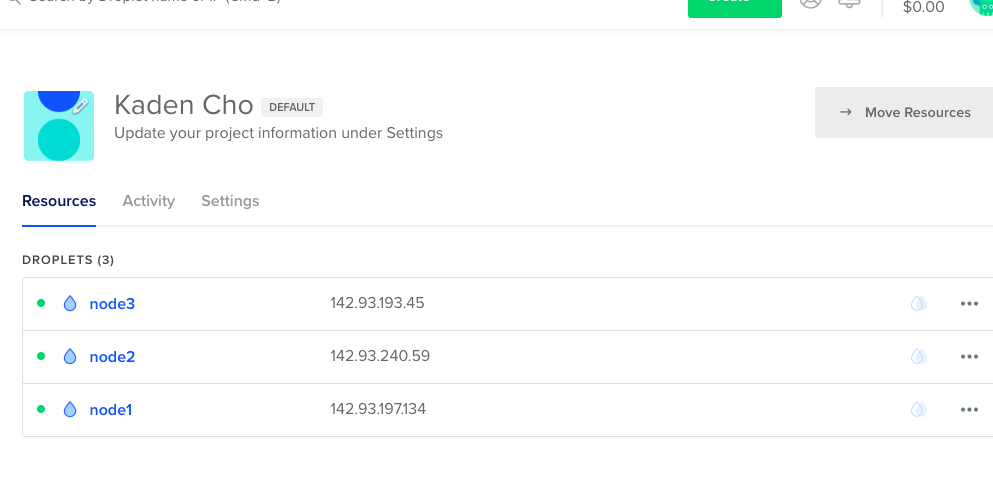

- get.docker.com

- [check firewall](https://www.bretfisher.com/docker-swarm-firewall-ports/)

```bash

docker swarm init --advertise-addr 142.93.193.45

docker swarm join --token S~~~ 142.93.193.45:2377


docker node ls

```

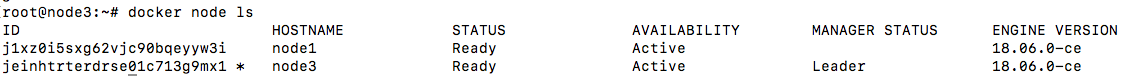

```bash

docker node update --role manager node1

```

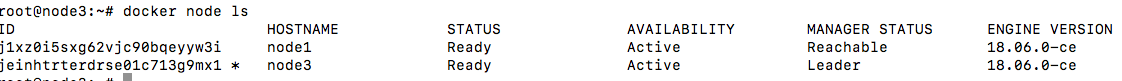

- on leader

```bash

docker swarm join-token manager

```

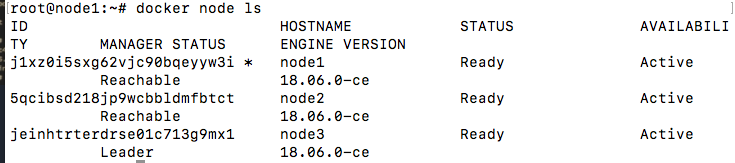

```bash

docker service create --replicas 3 alpine ping 8.8.8.8


docker service ls


docker node ps node2

docker service ps angry_stonebraker
```

# Scaling out with overlay networking

- just choose --driver overlay
  - for container-to-container traffic inside a single swarm
- Optional IPSec (AES) encryption

```bash

docker network create --driver overlay mydrupal

docker network ls



root@node1:~# docker network ls
NETWORK ID          NAME                DRIVER              SCOPE
c516701a0eda        bridge              bridge              local
cd3d3954de63        docker_gwbridge     bridge              local
9f1ef91396ea        host                host                local
tu00jjn780w3        ingress             overlay             swarm
rdntknohw6fx        mydrupal            overlay             swarm
62a136cb4f72        none                null                local


docker service create --name psql --network mydrupal -e POSTGRES_PASSWORD=kadencho postgres

docker service ps psql

# on node3

docker container logs psql.1.c7y85v8rd48k58e3m4x59nrdg

docker service create --name drupal --network mydrupal -p 80:80 drupal

docker service ls

# put one of the IP address and set blog basics
```

- service can't be on foreground : no need to -d because they do ochestor

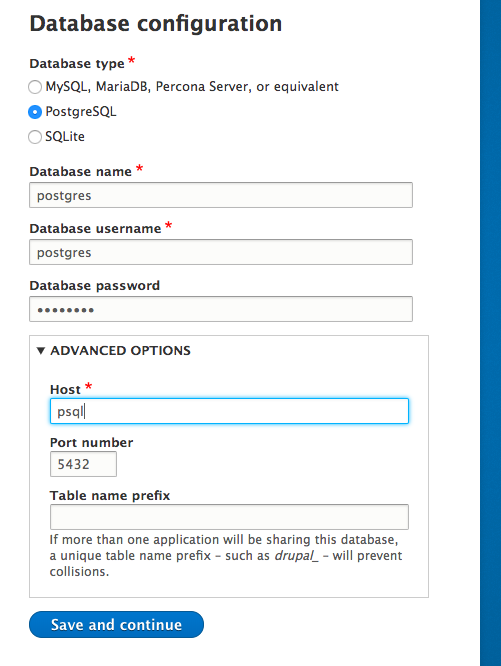

- overlay connect three

### Why all three works?

# Routing Mesh

- ingress packets for a service to proper task,  network 
- Spans all nodes in swarm
- Uses IPVs from linux kernel
- Load balances swarm services across their tasks
- Two ways this works
  - container-to-container in a Overlay networks(uses VIP, virtual IP that swarm make in front of each node
  - External traffic incoming to published ports (all nodes listen, no need to specific setting for web, db, etc)
  - It's not round robin

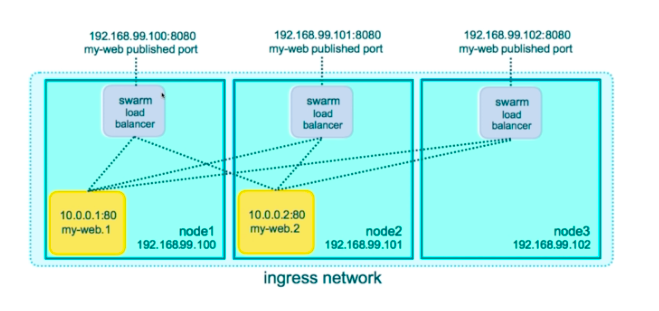

```bash

docker service create --name search --replicas 3 -p 9200:9200 elasticsearch:2


curl localhost:9200

curl localhost:9200

curl localhost:9200

curl localhost:9200


```

- Routing Mesh Cont
  - This is stateless load balancing : saying that if you have to use session cookies on your application, or it expects a consistent container to be talking to a consistent client, you may need to add some other things to help solve them problems
- it's actually layer-3 load balancer (TCP) not 4 (DNS) 
  - so operates at the IP and port layer
- options
  - Nginx or HAProxy LB Proxy, or 
  - Docker enterprise editio, which comes with built-in L4 web proxy

# Assignment : Create multi-service app